In [1]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv("Iris.csv")
data.drop("Id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data["Species"] = data["Species"].map({"Iris-virginica":0,"Iris-setosa":1,"Iris-versicolor":-1})
data = data[data["Species"] != 0]

In [5]:
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
len(data)

98

In [17]:
class Perception:
    """感知器算法，实现二分类"""
    
    def __init__(self, alpha, times):
        """初始化方法。
        
        """
        self.alpha = alpha
        self.times = times
        
    def step(self, z):
        """阶跃函数。
        
        Parameters
        ——————
        z:参数。根据z的值，返回1或者-1
        """
        
        return np.where(z>=0, 1, -1)
    
    def fit(self, X, y):
        """训练模型。
        
        """
        X = np.asarray(X)
        y = np.asarray(y)
        self.w_ = np.zeros(1 + X.shape[1])
        self.loss_ = []
        
        for i in range(self.times):
            loss = 0
            for x, target in zip(X, y):
                y_hat = self.step(np.dot(x, self.w_[1:]) + self.w_[0])
                loss += y_hat != target
                # 更新权重
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat)*x
            self.loss_.append(loss)
            
    def predict(self, X):
        """样本数据预测。（1或-1）
        
        """
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])        

In [18]:
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

In [19]:
p = Perception(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
display(result)
display(test_y.values)
display(p.w_)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1])

array([ 0.2 ,  0.22,  0.9 , -1.46, -0.74])

[1, 3, 2, 1, 0, 0, 0, 0, 0, 0]

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt


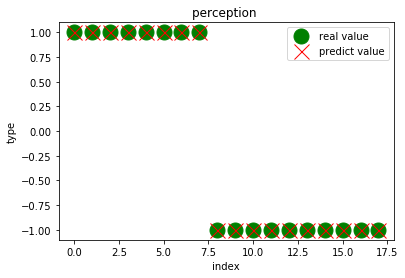

In [21]:
plt.plot(test_y.values, "go", ms=15, label="real value")
plt.plot(result, 'rx', ms=15, label='predict value')
plt.title('perception ')
plt.xlabel('index')
plt.ylabel('type')
plt.legend()
plt.show()

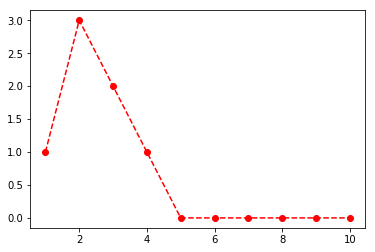

In [22]:
plt.plot(range(1,p.times+1), p.loss_, "ro--")